## Import libraries and data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
cond='clean'
path='D:\\jesyin\\HR_loss\\FFRs_FFT\\'

In [4]:
datapaths=[path]
files=[]
while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir
    with os.scandir(datapaths.pop()) as entries:
        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
            if entry.name.endswith(cond+'_res.pkl'):
                files.append(entry.path)

In [5]:
len(files)

32

## Subject, source FFRs and ground truths

In [6]:
f =open(files[0],'rb')
sffr_data=pickle.load(f)
#sffr_data

In [7]:
lo_df=pd.DataFrame([])
hi_df=pd.DataFrame([])
sub_list=[]

#low alpha condition
for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    sub = files[n].split('\\')[-1].split('_')[1]  # subject no.
    if sub=='ca':
        sub=0
    sub=int(sub)
    sub_list.append(sub)
    
    # df for low-alpha-indexed sffr
    # ba
    #lo_bapa=pd.DataFrame(sffr_data['ba_lo']['sffr'])
    lo_bapa=pd.DataFrame(sffr_data['poz_lowalpha']['FFRs'])
    lo_bapa=lo_bapa.T
    lo_bapa['Sub']=sub
    #lo_bapa['Token']=1 #'ba'
    lo_df=lo_df.append(lo_bapa)
    # pa
    #lo_pa=pd.DataFrame(sffr_data['pa_lo']['sffr'])
    #lo_pa=lo_pa.T
    #lo_pa['Sub']=sub
    #lo_pa['Token']=2 #'pa'
    #lo_df=lo_df.append(lo_pa)
    
#lo_df

In [8]:
# hi alpha condition
for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    sub = files[n].split('\\')[-1].split('_')[1]  # subject no.
    if sub=='ca':
        sub=0
    sub=int(sub)
    
    # df for low-alpha-indexed sffr
    # bapa
    hi_bapa=pd.DataFrame(sffr_data['poz_hialpha']['FFRs'])
    hi_bapa=hi_bapa.T
    hi_bapa['Sub']=sub
    #hi_bapa['Token']=1 #'a'
    hi_df=hi_df.append(hi_bapa)
    # pa
    #hi_pa=pd.DataFrame(sffr_data['pa_hi']['sffr'])
    #hi_pa=hi_pa.T
    #hi_pa['Sub']=sub
    #hi_pa['Token']=2 #'i'
    #hi_df=hi_df.append(hi_pa)


In [9]:
# setting subject no. as index
lo_df=lo_df.set_index('Sub')
hi_df=hi_df.set_index('Sub')

In [10]:
#len(lo_df[lo_df['Token']==2])

In [11]:
hi_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10104,-2.717964e-08,-4.310438e-08,-7.831566e-08,-6.184963e-08,-6.041155e-08,-5.644186e-08,-2.249652e-08,1.336865e-08,-1.196120e-09,-6.169351e-08,-7.722509e-08,-5.083157e-08,-2.057733e-08,4.726544e-09,3.455705e-08,1.314316e-07,1.919681e-07,1.356223e-07,7.110383e-08,2.769128e-08,-4.081649e-09,-2.312510e-08,-7.554736e-08,-7.283821e-08,-6.046749e-09,7.941932e-08,1.157427e-07,4.942504e-08,-9.783549e-10,-3.504621e-09,2.805608e-08,4.272155e-08,2.314814e-08,-2.807967e-08,-4.347604e-08,-1.291181e-08,-5.733461e-08,-1.007680e-07,-1.139438e-07,-8.303952e-08,-2.726012e-08,3.101310e-08,1.862250e-08,1.941995e-08,1.028965e-08,-1.151636e-08,-3.833852e-08,2.165331e-09,2.057037e-08,2.307730e-08,...,7.806349e-08,1.035933e-07,7.630751e-08,7.612883e-09,-3.100195e-08,-6.888104e-08,-9.645990e-08,-9.974130e-08,-4.799484e-08,1.854906e-08,4.826107e-08,2.566690e-08,2.740226e-08,3.938616e-08,7.770904e-08,8.616677e-08,3.536220e-08,-1.744953e-08,-3.333060e-09,7.014028e-08,8.285366e-08,6.914752e-08,6.886875e-09,7.257568e-09,5.072114e-08,1.228328e-09,-7.959727e-08,-1.819790e-07,-2.042817e-07,-1.399685e-07,-8.910377e-08,-8.923477e-08,-4.350238e-08,-1.082970e-08,2.508692e-08,1.323002e-08,-1.266660e-08,1.008022e-08,2.850383e-08,5.433076e-08,6.137041e-08,8.151872e-08,7.437402e-08,8.486500e-08,6.312271e-08,4.423955e-08,7.257306e-08,7.266011e-08,5.680954e-08,-3.331408e-09
10302,5.919039e-09,7.154007e-08,4.822220e-08,-2.949693e-09,-2.743151e-08,-3.218156e-08,-4.804345e-08,-2.328506e-08,-5.812081e-08,-3.441539e-08,8.807292e-09,3.989901e-08,6.178035e-08,6.164151e-08,4.216635e-08,2.417846e-08,4.409322e-08,5.637915e-08,-4.181260e-09,-4.494360e-08,-5.161520e-08,-2.477944e-08,-1.293229e-08,-3.342423e-08,-7.183445e-08,-8.830944e-08,-3.906824e-08,1.424640e-08,8.230591e-08,6.355361e-08,2.882938e-08,1.398021e-08,1.607918e-08,1.259205e-09,-9.464977e-09,-3.391603e-08,-2.375316e-08,-3.240571e-08,-6.545646e-08,-6.807285e-08,3.310041e-09,8.634345e-08,8.236228e-08,1.274147e-08,-3.594138e-08,-1.403651e-08,5.487127e-08,5.978473e-08,9.743695e-09,-2.372615e-08,...,-7.195078e-09,2.582373e-08,4.166021e-08,1.125748e-09,-1.891378e-08,-1.955309e-08,-1.862892e-08,-3.370737e-09,2.496235e-08,6.408578e-08,7.450650e-08,3.430390e-08,-2.300619e-09,-2.324351e-08,-1.060725e-09,1.710305e-08,2.330737e-08,4.309189e-09,5.799257e-09,2.072810e-08,8.535323e-09,-1.114329e-08,-3.920255e-08,-4.408616e-08,2.466778e-08,5.069682e-08,-8.830940e-09,-3.438184e-08,-4.334994e-08,2.681224e-08,6.403204e-08,2.007681e-08,-9.948570e-09,-1.866389e-08,-5.912137e-09,2.294608e-08,1.685149e-09,-3.832389e-08,-3.247912e-08,-1.313031e-08,-5.099379e-08,-7.201154e-08,-6.422139e-08,6.877442e-09,3.220126e-08,2.226032e-08,-3.593679e-08,-7.244863e-08,-2.125180e-09,6.263318e-08
10305,5.784068e-08,-4.796362e-08,-7.696738e-08,6.099712e-09,8.042996e-08,1.028147e-07,-2.509429e-08,-1.129514e-07,-8.062087e-08,1.660236e-08,9.342251e-08,9.262629e-08,3.325434e-08,-4.980174e-08,-4.673984e-08,-4.797550e-08,-6.817250e-09,1.298147e-08,2.164157e-08,-6.016736e-09,-4.454076e-08,-7.707902e-08,-1.197225e-07,-8.460776e-08,-6.206002e-08,-3.178684e-08,2.379625e-08,5.997968e-08,5.470680e-08,2.205607e-08,3.971675e-09,9.923087e-09,6.419782e-08,9.719353e-08,1.051578e-07,1.091242e-07,6.722225e-08,1.950502e-08,-1.889907e-08,6.040013e-09,4.634128e-08,6.711793e-08,1.589453e-08,-1.326933e-08,1.167634e-08,1.091395e-08,-3.697553e-08,-7.916901e-08,-4.429319e-08,6.671539e-09,...,5.096101e-08,4.424090e-08,9.829953e-09,-4.741266e-08,-6.420636e-08,1.739162e-09,4.892709e-08,3.660500e

In [12]:
lo_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10104,8.505105e-08,5.346718e-08,4.192679e-08,6.609464e-08,3.663869e-08,-1.087322e-08,-4.354915e-08,-3.835199e-08,-1.920364e-08,4.233640e-09,-4.230262e-09,-2.784027e-08,-3.187888e-08,-5.979114e-08,-2.865015e-08,-1.111671e-08,1.134405e-09,3.292255e-08,5.986134e-08,5.696218e-08,3.645709e-08,2.749945e-08,-6.171014e-09,-3.452328e-08,-3.077132e-08,-5.639663e-08,-2.092996e-08,1.163179e-08,3.697584e-08,1.151090e-08,-4.858695e-08,-8.806779e-08,-7.429194e-08,-1.338938e-08,1.293522e-08,3.504355e-08,-1.379480e-09,1.458349e-08,3.140778e-08,5.152952e-08,5.674747e-08,4.593674e-08,5.328384e-08,-4.636381e-09,-4.388797e-08,-7.830423e-08,-5.961453e-08,-3.873313e-08,-2.031474e-08,-5.614887e-09,...,-1.335189e-08,6.185286e-08,1.025646e-07,5.570485e-08,1.316041e-08,3.380024e-08,7.694680e-08,6.216957e-08,-4.882470e-09,-6.770247e-08,-2.450370e-08,4.962873e-08,1.061400e-07,1.152611e-07,4.051722e-08,-4.502085e-08,-1.108410e-07,-1.183522e-07,-5.100655e-08,-1.238486e-08,2.841199e-09,-7.174163e-10,-1.665380e-08,-7.995980e-09,-2.391560e-08,-6.067918e-08,-1.144519e-07,-2.653670e-08,7.412020e-08,1.288797e-07,9.077099e-08,-7.459358e-09,-7.356993e-08,-7.780576e-08,-3.263435e-09,3.431035e-08,5.091753e-08,6.852896e-08,3.343733e-08,3.905834e-08,5.764010e-08,6.860946e-08,4.933954e-09,-5.620700e-08,-9.151683e-08,-4.134329e-08,4.084856e-08,3.290204e-08,-8.663294e-10,-7.259076e-08
10302,-6.088825e-08,-5.369540e-08,-3.748609e-09,1.662114e-08,3.209673e-08,2.412970e-08,2.306463e-08,3.206915e-08,-3.296161e-08,-8.849790e-08,-9.248864e-08,-1.375652e-08,4.165544e-08,2.073512e-08,-3.284960e-08,-2.605964e-08,-4.486364e-08,1.367009e-08,3.047111e-08,6.318417e-08,7.166480e-08,5.638997e-08,-2.851550e-08,1.964943e-09,4.478248e-08,4.325513e-08,-1.522045e-08,-6.574360e-08,-3.849779e-08,3.211053e-08,3.996641e-08,-2.458239e-09,-2.636005e-08,-3.329320e-09,9.718750e-09,-4.369555e-08,-1.006558e-07,-9.108697e-08,1.712032e-08,7.059887e-08,2.902331e-08,-4.919955e-08,-4.266573e-08,2.254587e-08,7.069935e-08,5.319261e-08,-2.368063e-08,-1.071844e-07,-7.594536e-08,3.096717e-08,...,-7.722313e-09,-5.212973e-09,2.519595e-09,1.956707e-09,3.009923e-09,4.815981e-10,1.699612e-08,5.363452e-08,6.764762e-08,1.587501e-08,-4.365582e-08,-8.091485e-08,-6.978789e-08,2.884940e-09,4.246951e-08,3.372938e-08,-3.369853e-08,-4.259481e-08,3.631745e-09,4.650808e-08,2.030366e-08,-1.234656e-08,-2.759958e-08,-2.297143e-09,2.230826e-08,2.288720e-08,3.644731e-08,1.998320e-08,1.508385e-08,3.186737e-08,2.965952e-08,3.198781e-08,1.755989e-10,-5.120220e-08,-3.134849e-08,9.824724e-09,6.653688e-08,5.704335e-08,-3.113039e-08,-1.286544e-07,-1.527682e-07,-8.183788e-08,-1.919466e-08,2.829697e-08,2.101789e-08,3.589044e-08,6.911599e-08,5.336471e-08,4.725781e-08,3.722164e-08
10305,2.116169e-08,4.831278e-08,9.067164e-08,4.734682e-08,3.804560e-09,-2.727307e-08,-6.761156e-08,-7.770136e-08,-8.221995e-08,-5.697699e-08,-1.873161e-08,5.093798e-09,5.481368e-08,7.796352e-08,8.617032e-08,4.303631e-08,3.554014e-08,1.926842e-08,2.251139e-08,1.679324e-08,1.642375e-08,-5.320290e-09,-1.628036e-08,3.722394e-08,8.495103e-08,8.790268e-08,-6.202947e-09,-8.479924e-08,-9.336510e-08,-4.706009e-08,3.937305e-08,7.814055e-08,2.966475e-08,-5.849449e-09,-1.731386e-08,6.328351e-09,-1.066202e-08,3.702228e-09,1.526643e-08,6.316348e-08,6.852611e-08,3.388075e-09,-1.031260e-07,-1.736384e-07,-1.367067e-07,-7.787176e-08,-9.769588e-09,-2.361060e-08,-5.830283e-08,-7.123818e-08,...,-1.185237e-08,-5.656722e-09,8.323021e-09,-2.008278e-08,-5.292538e-08,-7.502850e-08,-6.827508e-08,-1.000

## Fast-Fourier Transform data

In [13]:
from scipy.fft import rfft, rfftfreq
from scipy.signal import blackman

In [14]:
# Extract 10-100 ms FFRs for FFT 
sfreq=5000
# Number of sample point
N = int(sfreq*(0.1-0.01))
# sample spacing
T = 1 / sfreq
# Blackman window to minimize leakage
w=blackman(N)
# Freq
xf = rfftfreq(N, T)

In [15]:
x=sffr_data['Time(s)']['FFRs']
t_fft=x[(x>=0.01) & (x<=0.1)]
len(t_fft)

450

In [16]:
fft_start=t_fft[0]
fft_end=t_fft[-1]
fft_start_index=x.tolist().index(fft_start)
fft_end_index=x.tolist().index(fft_end)

In [17]:
lo_fft_df=pd.DataFrame([])
hi_fft_df=pd.DataFrame([])

# low alpha condition
for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    sub = files[n].split('\\')[-1].split('_')[1]  # subject no.
    if sub=='ca':
        sub=0
    sub=int(sub)
    
    # df for low-alpha-indexed sffr
    # ba
    #lo_bapa=sffr_data['poz_lowalpha']['FFRs']
    lo_bapa=sffr_data['poz_lowalpha']['FFRs'][fft_start_index:fft_end_index+1]
    lo_fft_bapa=pd.DataFrame(np.abs(rfft(lo_bapa*w,norm='ortho')))
    lo_fft_bapa=lo_fft_bapa.T
    lo_fft_bapa['Sub']=sub
    #lo_fft_bapa['Token']=1 #'ba'
    lo_fft_df=lo_fft_df.append(lo_fft_bapa)
    # pa
    #lo_pa=sffr_data['pa_lo']['sffr']
    #lo_fft_pa=pd.DataFrame(np.abs(rfft(lo_pa*w,norm='ortho')))
    #lo_fft_pa=lo_fft_pa.T
    #lo_fft_pa['Sub']=sub
    #lo_fft_pa['Token']=2 #'pa'
    #lo_fft_df=lo_fft_df.append(lo_fft_pa)

In [18]:
# high alpha condition
for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    sub = files[n].split('\\')[-1].split('_')[1]  # subject no.
    if sub=='ca':
        sub=0
    sub=int(sub)
    
    # df for hiw-alpha-indexed sffr
    # bapa
    #hi_bapa=sffr_data['bapa_hi']['sffr']
    hi_bapa=sffr_data['poz_hialpha']['FFRs'][fft_start_index:fft_end_index+1]
    hi_fft_bapa=pd.DataFrame(np.abs(rfft(hi_bapa*w,norm='ortho')))
    hi_fft_bapa=hi_fft_bapa.T
    hi_fft_bapa['Sub']=sub
    #hi_fft_bapa['Token']=1 #'bapa'
    hi_fft_df=hi_fft_df.append(hi_fft_bapa)
    # pa
    #hi_pa=sffr_data['pa_hi']['sffr']
    #hi_fft_pa=pd.DataFrame(np.abs(rfft(hi_pa*w,norm='ortho')))
    #hi_fft_pa=hi_fft_pa.T
    #hi_fft_pa['Sub']=sub
    #hi_fft_pa['Token']=2 #'pa'
    #hi_fft_df=hi_fft_df.append(hi_fft_pa)

In [19]:
# set subject no. as index
lo_fft_df=lo_fft_df.set_index('Sub')
hi_fft_df=hi_fft_df.set_index('Sub')

In [20]:
hi_fft_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10104,8.432610e-09,6.286318e-09,1.056181e-08,1.161714e-08,1.092664e-08,1.008704e-08,1.197833e-08,2.412604e-08,2.980468e-08,1.530263e-08,2.775420e-08,4.026415e-08,6.963016e-08,6.678116e-08,1.160217e-07,9.345162e-08,3.080323e-08,8.589235e-09,1.959154e-08,2.364169e-08,3.149215e-08,3.178227e-08,4.094335e-08,2.123084e-08,2.765717e-08,5.939166e-08,7.864771e-08,7.843890e-08,5.365022e-08,6.606627e-08,9.302247e-08,9.834772e-08,8.807201e-08,9.625140e-08,8.128797e-08,7.204409e-08,6.838587e-08,8.864486e-08,5.130718e-08,2.798541e-08,4.881564e-08,6.721992e-08,5.990937e-08,1.183967e-08,5.225316e-08,5.159978e-08,7.193647e-08,1.328910e-07,1.363705e-07,1.096663e-07,...,2.052684e-09,2.534596e-09,2.211954e-09,4.052767e-09,3.702011e-09,3.031041e-09,2.309899e-09,1.422437e-09,2.553649e-09,3.817858e-09,4.063232e-09,2.977732e-09,1.288946e-09,4.158546e-09,3.777488e-09,2.953609e-09,3.114765e-09,1.454784e-09,2.343990e-09,3.116834e-09,5.684167e-09,2.633950e-09,1.608194e-09,2.924007e-09,4.848864e-09,5.527451e-09,3.928372e-09,5.335148e-09,5.358999e-09,5.851917e-09,7.892002e-09,5.486494e-09,3.482488e-09,4.807089e-09,4.551794e-09,3.919742e-09,3.394293e-09,2.936627e-09,3.510393e-09,6.058119e-09,7.374670e-09,4.077408e-09,1.846327e-09,6.138765e-09,6.566206e-09,5.167715e-09,3.427695e-09,2.165409e-09,4.077039e-09,6.261293e-09
10302,1.064971e-08,7.729632e-09,2.619406e-09,1.191944e-08,1.452727e-08,1.069184e-08,5.442467e-09,1.650290e-08,4.860306e-08,9.166439e-08,9.556158e-08,5.234917e-08,6.224532e-08,7.330815e-08,5.560416e-08,4.034979e-08,2.768180e-08,4.685889e-08,1.005265e-07,1.182336e-07,9.575796e-08,6.824810e-08,5.550671e-08,3.660430e-08,4.482111e-08,1.125636e-08,3.201100e-08,4.389010e-08,5.601296e-08,5.766561e-08,5.561329e-08,9.313730e-08,6.826601e-08,4.359187e-08,6.325049e-08,7.551173e-08,5.858862e-08,3.898839e-08,3.518011e-08,5.877107e-08,7.267864e-08,4.959089e-08,3.820737e-08,3.801264e-08,3.416260e-08,5.456005e-08,7.880547e-08,7.402588e-08,6.358589e-08,6.373183e-08,...,4.318546e-09,2.424291e-09,2.021807e-09,1.448205e-09,5.205895e-09,2.588935e-09,4.494523e-09,4.689084e-09,6.078139e-10,5.870464e-10,3.961573e-09,8.890134e-09,8.765648e-09,3.106930e-09,3.758266e-09,4.856525e-09,3.198846e-09,1.875675e-09,5.734755e-09,6.590698e-09,4.746549e-09,1.794090e-09,3.507580e-09,8.117620e-09,4.008264e-09,5.618385e-09,3.399358e-09,6.144774e-09,6.833983e-09,2.878352e-09,2.370213e-09,5.512364e-09,5.863361e-09,5.612376e-10,1.313781e-09,7.384043e-09,9.722516e-09,4.615883e-09,5.646353e-10,2.237753e-09,3.139435e-09,3.363863e-09,3.893527e-09,4.924092e-09,3.918947e-09,2.347549e-09,2.358916e-09,3.181581e-09,4.887910e-10,2.139095e-09
10305,1.557835e-09,1.291634e-08,1.682606e-08,8.383542e-09,5.025429e-09,1.035614e-08,5.793720e-09,1.342127e-08,4.178128e-08,5.271879e-08,5.794897e-08,7.732773e-08,6.335181e-08,6.112055e-08,5.496545e-08,3.958010e-08,1.685174e-08,1.263988e-08,1.838897e-08,1.162979e-08,3.164646e-08,6.536703e-08,5.744387e-08,4.478733e-09,3.786058e-08,3.210638e-08,6.563898e-08,6.041787e-08,2.146891e-08,4.891889e-08,4.479697e-08,3.251911e-08,3.144101e-08,4.870639e-08,3.319613e-08,2.083708e-08,6.387689e-08,7.883259e-08,5.253611e-08,4.107206e-08,4.810871e-08,1.041588e-08,5.100045e-08,3.093535e-08,1.382010e-08,2.491006e-08,2.263774e-08,1.133878e-08,2.870443e-08,2.269642e-08,...,1.525193e-09,2.808758e-09,4.568294e-09,8.291642e-09,6.524518e-09,4.193252e-09,4.938879e-09,5.434228e-09,6.527859e-09,4.778587e-09,1.641128e-09,1.119091e-09,2.831032e-09,4.815129e-09,6.824763e-09,8.094103e-09,7.247154e-09,7.853316e-09,7.325344e-09,5.774116e-09,1.775949e-

In [21]:
hi_fft_df.shape

(32, 226)

In [22]:
# save sffr df
fp='C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fn='noise_lo_bapa_sffr_df.pkl'
open_file = open(fp+fn, 'wb')
pickle.dump(lo_df, open_file)
open_file.close()
fn='noise_hi_bapa_sffr_df.pkl'
open_file = open(fp+fn, 'wb')
pickle.dump(hi_df, open_file)
open_file.close()

In [23]:
# save fft df
fp='C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fn='noise_lo_bapa_fft_df.pkl'
open_file = open(fp+fn, 'wb')
pickle.dump(lo_fft_df, open_file)
open_file.close()
fn='noise_hi_bapa_fft_df.pkl'
open_file = open(fp+fn, 'wb')
pickle.dump(hi_fft_df, open_file)
open_file.close()

## Load sffr and fft dataframe

In [24]:
fp='C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fn='lo_bapa_sffr_df.pkl'
open_file = open(fp+fn, 'rb')
lo_df = pickle.load(open_file)

fn='hi_bapa_sffr_df.pkl'
open_file = open(fp+fn, 'rb')
hi_df = pickle.load(open_file)

In [25]:
fn='lo_bapa_fft_df.pkl'
open_file = open(fp+fn, 'rb')
lo_fft_df = pickle.load(open_file)

fn='hi_bapa_fft_df.pkl'
open_file = open(fp+fn, 'rb')
hi_fft_df = pickle.load(open_file)

## Normal hearing vs Hearing loss subjects 

In [26]:
paths = 'C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fname = 'RotmanSIN_subjects_demo_behav.xlsx'

In [27]:
sub_demo=pd.read_excel(paths+fname,engine='openpyxl', sheet_name='Sheet1',usecols='A:AF')
sub_demo

,Document Information Study # 561,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Audiogram,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BEHAVIORAL DATA,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right,NaN,NaN,NaN,NaN,NaN,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean,NaN,NaN,NaN,noise,NaN
1,Participant ID,Subject #,Date (MM/DD/YYYY),Gender,Age,Quick Sin Scores,NaN,NaN,NaN,avg,250,500.0,1000.0,2000.0,4000.0,8000.0,250,500.0,1000.0,2000.0,4000.0,8000.0,avg,PTA,Hearing loss based on AVG,NaN,PC (%),RT (ms),throughput (%/ms),NaN,PC (%),RT (ms)
2,ca,1,2015-11-13 00:00:00,M,52,-4.5,2.5,0.5,1.5,0,10,15.0,20.0,20.0,15.0,10.0,10,5.0,20.0,25.0,0.0,-5.0,12.083333,17.5,False,NaN,83.374398,503.543333,0.165575,NaN,70.880231,601.93881
3,11385,2,2015-11-20 00:00:00,F,66,0.5,0.5,5.5,0.5,1.75,15,10.0,10.0,-5.0,20.0,50.0,0,15.0,10.0,10.0,5.0,55.0,16.25,8.333333,False,NaN,94.090278,550.94381,0.17078,NaN,97.4093,525.07381
4,12065,3,2015-11-24 00:00:00,F,68,5.5,2.5,0.5,1.5,2.5,30,20.0,15.0,15.0,40.0,15.0,25,20.0,15.0,15.0,25.0,35.0,22.5,16.666667,False,NaN,94.535427,476.661667,0.198328,NaN,78.697832,459.847857
5,9702,4,2015-11-30 00:00:00,F,74,4.5,9.5,8.5,4.5,6.75,60,45.0,25.0,20.0,30.0,60.0,65,50.0,30.0,20.0,50.0,70.0,43.75,31.666667,True,NaN,49.268539,515.64381,0.095548,NaN,52.538879,562.597857
6,4822,5,2015-12-01 00:00:00,F,72,5.5,-3.5,8.5,0.5,2.75,25,25.0,30.0,35.0,40.0,70.0,30,30.0,35.0,40.0,55.0,80.0,41.25,32.5,True,NaN,88.597568,566.498095,0.156395,NaN,90.507215,611.038571
7,8023,6,2015-12-03 00:00:00,M,70,10.5,11.5,5.5,6.5,8.5,40,45.0,45.0,45.0,50.0,60.0,40,40.0,40.0,55.0,55.0,75.0,49.166667,45,True,NaN,72.634427,505.693095,0.143633,NaN,95.099045,520.474286
8,12603,7,12/09/1015,M,75,0.5,5.5,4.5,0.5,2.75,25,35.0,30.0,40.0,55.0,65.0,30,30.0,40.0,50.0,70.0,75.0,45.416667,37.5,True,NaN,93.022344,477.599765,0.19477,NaN,91.675165,479.103286
9,11591,8,2015-12-11 00:00:00,F,72,1.5,1.5,1.5,5.5,2.5,15,10.0,15.0,15.0,25.0,25.0,15,10.0,5.0,15.0,10.0,35.0,16.25,11.666667,False,NaN,97.127295,593.109155,0.16376,NaN,96.638655,615.833803


In [28]:
# Get subject no. and column for hearing threshold
sub_hearing=sub_demo[['Document Information Study # 561','Unnamed: 24']]

In [29]:
# Subject hearing threshold dataframe
sub_hearing.columns=sub_hearing.iloc[1]
sub_hearing.drop(sub_hearing.index[0:2],inplace=True)
# convert sub 'ca' to 0
sub_hearing.loc[2,'Participant ID']=0
sub_hearing.loc[2,:]

1
Participant ID                    0
Hearing loss  based on AVG    False
Name: 2, dtype: object

In [30]:
# separate subjects into Normal heairing (NH) vs Hearing loss (HL)
NH=sub_hearing[sub_hearing['Hearing loss  based on AVG']==False]
HL=sub_hearing[sub_hearing['Hearing loss  based on AVG']==True]

In [31]:
NH_sub=NH['Participant ID'].values.astype(int)
NH_sub

array([    0, 11385, 12065, 11591, 13005, 13037,  2330,  7160, 11869,
       11603,  7697, 11660, 11592])

In [32]:
HL_sub=HL['Participant ID'].values.astype(int)
HL_sub

array([ 9702,  4822,  8023, 12603, 12459,  9254, 10305, 11801, 10104,
        6350,  5554, 11383, 12675,  6169,  4628, 11257, 11479, 11612,
       10302])

In [39]:
# clean behavior
clean_test=sub_demo[['Document Information Study # 561','BEHAVIORAL DATA','Unnamed: 27']] #clean
#clean_test=sub_demo[['Document Information Study # 561','Unnamed: 30','Unnamed: 31']] #noise
clean_test.columns=clean_test.iloc[1]
clean_test.drop(clean_test.index[0:2],inplace=True)
# convert sub 'ca' to 0
clean_test.loc[2,'Participant ID']=0
clean_test=clean_test[:-4]
clean_test

1,Participant ID,PC (%),RT (ms)
2,0,83.374398,503.543333
3,11385,94.090278,550.94381
4,12065,94.535427,476.661667
5,9702,49.268539,515.64381
6,4822,88.597568,566.498095
7,8023,72.634427,505.693095
8,12603,93.022344,477.599765
9,11591,97.127295,593.109155
10,13005,84.42816,506.600469
11,13037,92.613086,501.061033


In [40]:
clean_test=clean_test.set_index('Participant ID')

In [41]:
clean_test=clean_test.astype('float')
clean_test.dtypes

1
PC (%)     float64
RT (ms)    float64
dtype: object

In [42]:
clean_test.describe()

1,PC (%),RT (ms)
count,32.000000,32.000000
mean,82.849051,507.168937
std,19.558508,52.832424
min,31.833046,435.720892
25%,80.934629,477.365241
50%,90.352073,497.237793
75%,95.677330,530.915493
max,99.509804,696.864789


In [43]:
clean_test['PC_rank']=0

for sub in clean_test.index:
    low= clean_test['PC (%)'].quantile(q=0.30) # lower quantile
    up= clean_test['PC (%)'].quantile(q=0.7) # upper quantile
    med = clean_test['PC (%)'].quantile(q=0.5) # med
    if clean_test['PC (%)'][sub]<=low:
        clean_test['PC_rank'][sub]=0
    elif clean_test['PC (%)'][sub]>low and clean_test['PC (%)'][sub]<up:
        clean_test['PC_rank'][sub]=2
    elif clean_test['PC (%)'][sub]>=up:
        clean_test['PC_rank'][sub]=1

In [44]:
#low=clean_test['PC (%)'].quantile(q=0.25)
low

84.28062163979759

In [45]:
# NH low and high alpha df
NH_lo_df=lo_df[lo_df.index.isin(NH_sub)]
NH_hi_df=hi_df[hi_df.index.isin(NH_sub)]
len(NH_lo_df)

13

In [46]:
NH_lo_df['hear_loss']=0
NH_hi_df['hear_loss']=0

In [47]:
# NH low and high alpha df for FFT
NH_lo_fft_df=lo_fft_df[lo_fft_df.index.isin(NH_sub)]
NH_hi_fft_df=hi_fft_df[hi_fft_df.index.isin(NH_sub)]
len(NH_lo_fft_df)

13

In [48]:
NH_lo_fft_df['hear_loss']=0
NH_hi_fft_df['hear_loss']=0

In [49]:
# HL low and high df
HL_lo_df=lo_df[lo_df.index.isin(HL_sub)]
HL_hi_df=hi_df[hi_df.index.isin(HL_sub)]
len(HL_lo_df)

19

In [50]:
HL_lo_df['hear_loss']=1
HL_hi_df['hear_loss']=1

In [51]:
# HL low and high alpha df for FFT
HL_lo_fft_df=lo_fft_df[lo_fft_df.index.isin(HL_sub)]
HL_hi_fft_df=hi_fft_df[hi_fft_df.index.isin(HL_sub)]
len(HL_lo_fft_df)

19

In [52]:
HL_lo_fft_df['hear_loss']=1
HL_hi_fft_df['hear_loss']=1

In [53]:
# concat NH and HL for lo
all_lo_df=pd.concat([NH_lo_df,HL_lo_df])
# concat NH and HL for hi
all_hi_df=pd.concat([NH_hi_df,HL_hi_df])

In [54]:
# concat NH and HL for lo fft
all_lo_fft_df=pd.concat([NH_lo_fft_df,HL_lo_fft_df])
# concat NH and HL for hi fft
all_hi_fft_df=pd.concat([NH_hi_fft_df,HL_hi_fft_df])

In [55]:
all_hi_fft_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,hear_loss
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11385,3.841616e-09,1.020816e-08,9.966981e-09,3.624359e-09,6.152043e-09,8.897395e-09,1.107788e-08,2.723689e-08,4.391392e-08,5.674871e-08,6.686634e-08,4.606300e-08,3.543017e-08,4.489264e-08,5.692417e-08,5.311448e-08,2.856860e-08,2.929840e-08,3.630532e-08,4.626916e-08,3.701300e-08,2.941408e-08,3.116136e-08,3.032162e-08,3.671646e-08,8.368868e-09,2.488957e-08,3.195569e-08,6.216421e-08,3.957436e-08,4.294215e-08,6.895680e-08,6.120853e-08,6.027698e-08,6.300889e-08,3.209604e-08,2.275283e-08,2.715634e-08,4.411394e-08,6.237261e-08,3.605548e-08,2.645508e-08,4.394436e-08,3.521485e-08,4.389082e-08,7.065118e-08,8.763733e-08,6.780856e-08,2.050941e-08,3.903068e-08,...,2.069054e-09,6.401656e-09,8.163922e-09,3.532001e-09,2.648619e-09,6.446497e-09,5.114710e-09,2.047614e-09,3.801586e-09,4.264243e-09,6.523991e-09,6.187218e-09,2.640990e-09,3.063089e-09,5.101599e-09,3.703154e-09,1.084223e-09,6.877533e-09,1.015659e-08,9.728684e-09,7.283624e-09,3.829552e-09,2.882677e-09,2.946091e-09,5.848572e-09,3.027230e-09,5.275248e-09,8.564384e-09,8.955774e-09,6.277294e-09,3.588602e-09,3.996394e-09,8.450596e-09,5.748990e-09,6.588202e-09,8.531781e-09,4.529566e-09,1.383891e-09,4.427612e-09,3.310051e-09,3.473027e-09,3.588955e-09,4.859491e-09,8.699659e-09,7.502704e-09,2.749132e-09,2.258867e-09,4.419974e-09,2.143508e-09,0
11591,3.579226e-09,7.325307e-09,8.957153e-09,4.804656e-09,4.824716e-09,6.568652e-09,3.560377e-09,2.992712e-08,7.623853e-08,1.221912e-07,1.151714e-07,5.776102e-08,1.310437e-08,4.218735e-08,6.614792e-08,8.245891e-09,2.251538e-08,1.234760e-08,5.890130e-08,5.755234e-08,1.941912e-08,4.614765e-08,3.874631e-08,1.488917e-08,4.471262e-08,1.649823e-08,3.805677e-08,3.967823e-08,1.458185e-08,5.438431e-08,9.386977e-08,8.588786e-08,6.562966e-08,5.245853e-08,2.424396e-08,4.495959e-08,6.041477e-08,7.913989e-08,4.221461e-08,2.173222e-08,8.990887e-08,1.102499e-07,8.145869e-08,5.976445e-08,6.197710e-08,2.379459e-08,2.037580e-08,1.968051e-08,6.633326e-09,4.814922e-08,...,1.077633e-08,1.066428e-08,6.856121e-09,3.774342e-09,6.424497e-09,7.552764e-09,3.574796e-09,1.350572e-09,1.086902e-09,4.879554e-10,2.603521e-09,4.053094e-09,3.763513e-09,4.079332e-09,8.661404e-09,9.371234e-09,7.082563e-09,2.301013e-09,4.259794e-10,2.978146e-09,3.475711e-09,8.341334e-10,3.039649e-09,5.209068e-09,5.152529e-09,2.884648e-09,1.367623e-09,6.115581e-09,8.588965e-09,7.263702e-09,5.704704e-09,1.989649e-09,4.466791e-09,4.647851e-09,1.279759e-09,5.924093e-09,6.260110e-09,4.404566e-09,7.371592e-10,1.471749e-09,1.447459e-09,2.482972e-09,5.729349e-09,7.920831e-09,6.893138e-09,4.469795e-09,3.629917e-09,3.774205e-09,2.288290e-09,0
11592,8.376866e-10,7.048307e-09,1.005841e-08,6.731718e-09,1.183821e-08,1.371366e-08,9.284917e-09,3.097387e-08,5.413598e-08,4.807391e-08,3.509532e-08,5.331641e-08,3.139316e-08,2.339029e-08,5.272420e-08,7.026342e-08,5.166748e-08,2.767894e-08,2.955157e-08,4.119695e-08,5.124844e-08,6.490122e-08,6.129539e-08,5.478725e-08,3.563050e-08,3.040300e-08,2.351267e-08,1.912727e-08,3.225121e-08,5.606363e-08,4.645753e-08,4.215973e-08,3.753949e-08,4.800092e-08,4.665167e-08,1.921157e-08,1.632457e-08,2.884045e-08,1.253542e-08,4.550777e-08,7.439264e-08,7.326423e-08,5.718484e-08,7.076272e-08,7.116403e-08,6.008408e-08,4.488420e-08,2.803314e-08,2.637929e-08,3.572760e-08,...,6.559282e-09,8.826634e-09,5.321031e-09,1.132337e-09,2.986504e-09,4.392335e-09,2.021839e-09,4.921402e-09,8.507567e-09,7.187901e-09,3.546871e-09,1.514172e-09,4.221868e-09,7.765006e-09,7.587525e-09,4.434508e-09,5.115731e-09,6.483365e-09,6.604148e-09,5.323819e-09,5.786551e-09,7.771241e-09,

In [56]:
all_lo_fft_df['PC (%)']=clean_test['PC (%)']
all_hi_fft_df['PC (%)']=clean_test['PC (%)']
#all_lo_fft_df['RT (ms)']=clean_test['RT (ms)']
all_lo_fft_df['PC_rank']=clean_test['PC_rank']
all_hi_fft_df['PC_rank']=clean_test['PC_rank']

In [57]:
#for ll in range(len(all_lo_fft_df)):
#    if all_lo_fft_df.iloc[ll,-4]==2:
#        all_lo_fft_df.iloc[ll,-4]=0

all_lo_fft_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,hear_loss,PC (%),PC_rank
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11385,6.214912e-09,8.787838e-09,5.406772e-09,6.907051e-09,5.304339e-09,4.157869e-09,1.115376e-08,9.545405e-09,3.072051e-08,7.170450e-08,7.773873e-08,4.696478e-08,1.235347e-08,2.021991e-08,7.725888e-08,9.666201e-08,6.292477e-08,3.947885e-08,2.954973e-08,5.842947e-09,3.265281e-08,7.731637e-08,8.875839e-08,5.726246e-08,6.099801e-09,4.022339e-08,4.179133e-08,3.463035e-08,5.681830e-08,5.964883e-08,3.480088e-08,2.909211e-08,2.611124e-08,1.474564e-08,2.900168e-08,4.260802e-08,5.683005e-08,9.226246e-08,7.035133e-08,1.745337e-08,5.881445e-08,2.870371e-08,4.993944e-08,7.238347e-08,5.798334e-08,4.274242e-08,4.468502e-08,7.741502e-08,1.044304e-07,9.446820e-08,...,8.232081e-09,5.151941e-09,3.755714e-09,5.154517e-09,5.181704e-09,3.864171e-09,2.279211e-09,4.318128e-09,3.200687e-09,2.792168e-10,1.340829e-09,2.000325e-09,3.648375e-09,9.184856e-10,1.738976e-09,1.773276e-09,1.513057e-09,4.480275e-09,2.273949e-09,2.344078e-09,5.521706e-09,6.001799e-09,5.852579e-09,6.189187e-09,6.350770e-09,4.511614e-09,3.236518e-09,3.348732e-09,2.423014e-09,1.065565e-08,1.368540e-08,7.370182e-09,5.382954e-09,5.603159e-09,2.990796e-09,5.261337e-09,6.632563e-09,3.103542e-09,2.637629e-09,2.961672e-09,7.975709e-10,7.583018e-10,2.782989e-09,3.961848e-09,4.129661e-09,3.120329e-09,2.010681e-09,0,94.090278,2
11591,1.577303e-09,4.433606e-09,2.522020e-09,1.001640e-08,9.984071e-09,7.700996e-09,8.752415e-09,2.233647e-08,3.546990e-08,4.107440e-08,8.458881e-09,3.522626e-08,4.648514e-08,6.749898e-08,7.650204e-08,7.262746e-08,3.865250e-08,3.399301e-08,3.768555e-08,2.311536e-08,4.591876e-08,4.459467e-08,4.353409e-08,2.400879e-08,2.897007e-08,1.708385e-08,5.517836e-08,6.122942e-08,3.553425e-08,4.868031e-08,8.531630e-08,8.115637e-08,2.618127e-08,4.097628e-08,2.257942e-08,3.218308e-08,1.543720e-08,4.186796e-08,7.087232e-08,7.666455e-08,4.230499e-08,1.750213e-08,3.627356e-08,6.486318e-08,5.520260e-08,8.956327e-08,1.309885e-07,8.685272e-08,1.933194e-08,3.480479e-08,...,2.082809e-09,5.308207e-09,8.595049e-09,7.816981e-09,5.073084e-09,4.089331e-09,4.723855e-09,5.059884e-09,7.332279e-09,6.935842e-09,7.267003e-09,9.267775e-09,8.001419e-09,4.057792e-09,6.448222e-09,5.211251e-09,2.470216e-09,4.828335e-09,2.695141e-09,4.752902e-10,1.553299e-09,5.495014e-09,6.576078e-09,5.531582e-09,4.511127e-09,2.765734e-09,4.051863e-09,4.769825e-09,3.414790e-09,2.810104e-09,2.608263e-09,1.115378e-09,2.764717e-09,3.216655e-09,2.549667e-09,3.304656e-09,3.530966e-09,3.009533e-09,3.583859e-09,3.540443e-09,6.020389e-09,3.502809e-09,2.266798e-09,3.648287e-09,2.201292e-09,5.767070e-09,8.076450e-09,0,97.127295,1
11592,1.261347e-08,6.263788e-09,2.424758e-09,1.133095e-08,1.223118e-08,3.882666e-09,6.758067e-09,2.167193e-08,2.815975e-08,3.781854e-08,2.568888e-08,6.607608e-08,6.138908e-08,3.018542e-08,4.351045e-08,3.006773e-08,8.357190e-09,2.313819e-08,6.063375e-08,5.815706e-08,1.443066e-08,4.708908e-08,4.746384e-08,4.203533e-08,3.864022e-08,3.270711e-08,1.584978e-08,2.222903e-08,2.536002e-08,1.627754e-08,4.952197e-08,7.381361e-08,2.735738e-08,4.072583e-08,1.676896e-08,5.825592e-09,3.589888e-08,7.668352e-08,9.644309e-08,9.462961e-08,6.665058e-08,5.692306e-08,5.719672e-08,2.540928e-08,2.527158e-08,6.695165e-08,6.369493e-08,3.612486e-08,3.404939e-08,4.374152e-08,...,4.000096e-09,1.730559e-09,6.267853e-09,6.507190e-09,8.442260e-09,7.318750e-09,2.043753e-09,3.866330e-09,6.932573e-09,3.334490e-09,1.294076e-09,3.204016e-09,3.356853e-09,2.716596e-09,5.110926e-09,7.435977e-09,4.874852e-09,3.917278e-09,4.112357e-09,4.026973e-09,2.166897e-09,2.611029e-09,1.904450e-09,2.970490

In [58]:
#for ll in range(len(all_hi_fft_df)):
#    if all_hi_fft_df.iloc[ll,-4]==2:
#        all_hi_fft_df.iloc[ll,-4]=0

all_hi_fft_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,hear_loss,PC (%),PC_rank
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11385,3.841616e-09,1.020816e-08,9.966981e-09,3.624359e-09,6.152043e-09,8.897395e-09,1.107788e-08,2.723689e-08,4.391392e-08,5.674871e-08,6.686634e-08,4.606300e-08,3.543017e-08,4.489264e-08,5.692417e-08,5.311448e-08,2.856860e-08,2.929840e-08,3.630532e-08,4.626916e-08,3.701300e-08,2.941408e-08,3.116136e-08,3.032162e-08,3.671646e-08,8.368868e-09,2.488957e-08,3.195569e-08,6.216421e-08,3.957436e-08,4.294215e-08,6.895680e-08,6.120853e-08,6.027698e-08,6.300889e-08,3.209604e-08,2.275283e-08,2.715634e-08,4.411394e-08,6.237261e-08,3.605548e-08,2.645508e-08,4.394436e-08,3.521485e-08,4.389082e-08,7.065118e-08,8.763733e-08,6.780856e-08,2.050941e-08,3.903068e-08,...,8.163922e-09,3.532001e-09,2.648619e-09,6.446497e-09,5.114710e-09,2.047614e-09,3.801586e-09,4.264243e-09,6.523991e-09,6.187218e-09,2.640990e-09,3.063089e-09,5.101599e-09,3.703154e-09,1.084223e-09,6.877533e-09,1.015659e-08,9.728684e-09,7.283624e-09,3.829552e-09,2.882677e-09,2.946091e-09,5.848572e-09,3.027230e-09,5.275248e-09,8.564384e-09,8.955774e-09,6.277294e-09,3.588602e-09,3.996394e-09,8.450596e-09,5.748990e-09,6.588202e-09,8.531781e-09,4.529566e-09,1.383891e-09,4.427612e-09,3.310051e-09,3.473027e-09,3.588955e-09,4.859491e-09,8.699659e-09,7.502704e-09,2.749132e-09,2.258867e-09,4.419974e-09,2.143508e-09,0,94.090278,2
11591,3.579226e-09,7.325307e-09,8.957153e-09,4.804656e-09,4.824716e-09,6.568652e-09,3.560377e-09,2.992712e-08,7.623853e-08,1.221912e-07,1.151714e-07,5.776102e-08,1.310437e-08,4.218735e-08,6.614792e-08,8.245891e-09,2.251538e-08,1.234760e-08,5.890130e-08,5.755234e-08,1.941912e-08,4.614765e-08,3.874631e-08,1.488917e-08,4.471262e-08,1.649823e-08,3.805677e-08,3.967823e-08,1.458185e-08,5.438431e-08,9.386977e-08,8.588786e-08,6.562966e-08,5.245853e-08,2.424396e-08,4.495959e-08,6.041477e-08,7.913989e-08,4.221461e-08,2.173222e-08,8.990887e-08,1.102499e-07,8.145869e-08,5.976445e-08,6.197710e-08,2.379459e-08,2.037580e-08,1.968051e-08,6.633326e-09,4.814922e-08,...,6.856121e-09,3.774342e-09,6.424497e-09,7.552764e-09,3.574796e-09,1.350572e-09,1.086902e-09,4.879554e-10,2.603521e-09,4.053094e-09,3.763513e-09,4.079332e-09,8.661404e-09,9.371234e-09,7.082563e-09,2.301013e-09,4.259794e-10,2.978146e-09,3.475711e-09,8.341334e-10,3.039649e-09,5.209068e-09,5.152529e-09,2.884648e-09,1.367623e-09,6.115581e-09,8.588965e-09,7.263702e-09,5.704704e-09,1.989649e-09,4.466791e-09,4.647851e-09,1.279759e-09,5.924093e-09,6.260110e-09,4.404566e-09,7.371592e-10,1.471749e-09,1.447459e-09,2.482972e-09,5.729349e-09,7.920831e-09,6.893138e-09,4.469795e-09,3.629917e-09,3.774205e-09,2.288290e-09,0,97.127295,1
11592,8.376866e-10,7.048307e-09,1.005841e-08,6.731718e-09,1.183821e-08,1.371366e-08,9.284917e-09,3.097387e-08,5.413598e-08,4.807391e-08,3.509532e-08,5.331641e-08,3.139316e-08,2.339029e-08,5.272420e-08,7.026342e-08,5.166748e-08,2.767894e-08,2.955157e-08,4.119695e-08,5.124844e-08,6.490122e-08,6.129539e-08,5.478725e-08,3.563050e-08,3.040300e-08,2.351267e-08,1.912727e-08,3.225121e-08,5.606363e-08,4.645753e-08,4.215973e-08,3.753949e-08,4.800092e-08,4.665167e-08,1.921157e-08,1.632457e-08,2.884045e-08,1.253542e-08,4.550777e-08,7.439264e-08,7.326423e-08,5.718484e-08,7.076272e-08,7.116403e-08,6.008408e-08,4.488420e-08,2.803314e-08,2.637929e-08,3.572760e-08,...,5.321031e-09,1.132337e-09,2.986504e-09,4.392335e-09,2.021839e-09,4.921402e-09,8.507567e-09,7.187901e-09,3.546871e-09,1.514172e-09,4.221868e-09,7.765006e-09,7.587525e-09,4.434508e-09,5.115731e-09,6.483365e-09,6.604148e-09,5.323819e-09,5.786551e-09,7.771241e-09,7.147699e-09,2.930544e-09,1.873774e-09,2.513629

## SVM for low vs high alpha sffr

In [59]:
import random
from sklearn import svm
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
all_lo_fft_df.shape

(32, 229)

In [61]:
data_lo=all_lo_fft_df[all_lo_fft_df['PC_rank']!=2]
data_lo.shape

(20, 229)

In [62]:
data_hi=all_hi_fft_df[all_hi_fft_df['PC_rank']!=2]
data_hi.shape

(20, 229)

In [63]:
bad=data_lo[data_lo['PC_rank']==0]
len(bad)

10

In [64]:
good=data_lo[data_lo['PC_rank']==1]
len(good)

10

In [46]:
#med=all_hi_fft_df[all_hi_fft_df['PC_rank']==2]
#med

In [47]:
# randomly draw subjects for cross validation
#def partition (list_in, n):
#    random.shuffle(list_in)
#    return [list_in[i::n] for i in range(n)]

In [126]:
# Cross-validation (by subjects)
def CV_sepsub(data, subjects,output):
    # Separate data for CV
    #subgroup=partition(subjects,6)
    #if len(subjects)>15:
    #    subgroup=partition(subjects,4)
    #else:
    #    subgroup=partition(subjects,3)
    sfk=StratifiedKFold(n_splits=4, shuffle=True)
    folds=sfk.split(subjects,output)
        
    scores=[]
    f1scores=[]
    matrices=[]
    #test_n=[]
    #score_test_n=[]
    #f1score_test_n=[]
    result={}
    for train_idx, test_idx in folds:
        sub_train=all_sub[train_idx]
        sub_test=all_sub[test_idx]

        data_train = data.loc[sub_train,:]
        data_test = data.loc[sub_test,:]
     
        # Train data 
        X_train = data_train.drop(columns=['hear_loss','PC_rank','PC (%)'],inplace=False)
        Y_train = data_train['PC_rank'] #Outcome variable here
    
        # Test data 
        x_test = data_test.drop(columns=['hear_loss','PC_rank','PC (%)'],inplace=False)
        y_test = data_test['PC_rank'] #Outcome variable here
        
        # Select best
        #select_best = SelectKBest(score_func=chi2, k=100)# select best features
        #X_train=select_best.fit_transform(X_train, Y_train)
        #x_test=select_best.transform(x_test)
        
        # Add in additional column
        #X_train=pd.DataFrame(X_train)
        #x_test=pd.DataFrame(x_test)
        #X_train['hear_loss']=data_train['hear_loss'].values
        #x_test['hear_loss']=data_test['hear_loss'].values
        
        # resample for imbalanced data
        #rs=SMOTE()
        rs=RandomOverSampler(sampling_strategy='minority')
        X_train_rs,Y_train_rs=rs.fit_resample(X_train,Y_train)
        #print(Y_train_rs.values)
        #print(y_test.values)
        
        # Scaling
        #scaler = StandardScaler()
        #X_train= scaler.fit_transform(X_train)
        #x_test = scaler.transform(x_test)
        
        # classifier
        clf = svm.SVC(kernel='rbf', C=1000,gamma='scale')
        #clf=XGBClassifier(learning_rate=0.01,n_estimators=1000, max_depth=4,
        #                  subsample = 0.8,colsample_bytree = 0.8,gamma=1,
        #                  min_child_weight = 1 ,nthread=4,objective='binary:logistic',
        #                  eval_metric='logloss',seed=1)
        #clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
        #clf=RandomForestClassifier(n_estimators=20,max_depth=25,criterion='log_loss')
        # Train the model on training data
        clf.fit(X_train_rs, Y_train_rs)
        # predict
        y_pred=clf.predict(x_test)
        #print(y_test.values)
        #print(y_pred)
        # accuracy
        acc=accuracy_score(y_test, y_pred)
        scores.append(acc)
        # f1
        f1=f1_score(y_test, y_pred, average='weighted')
        f1scores.append(f1)
        # confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm = cm / np.vstack(cm.astype(float).sum(axis=1))
        matrices.append(cm)
        #test_n.append(len(sub_test))
        #score_test_n.append(acc*len(sub_test))
        #f1score_test_n.append(f1score*len(sub_test))
    
    result['acc']=scores
    result['f1']=f1scores
    result['cm']=matrices
    result['mean_acc']= np.mean(scores)#(sum(score_test_n))/len(subjects)
    result['mean_f1']= np.mean(f1scores)#(sum(f1score_test_n))/len(subjects)
    result['mean_cm']=np.mean(matrices, axis=0)
    #print(result['acc'])
    #print(result['test_n'])
    return result

In [127]:
#sfk=StratifiedKFold(n_splits=4, shuffle=True)
#folds=sfk.split(all_sub,all_output)
#data=all_lo_fft_df

#for train_idx, test_idx in folds:    
#    sub_train=all_sub[train_idx]
#    sub_test=all_sub[test_idx]
    
    #print('Train:')
    #print(data.loc[sub_train,'hear_loss'])
#    print('Test:')
#    print(data.loc[sub_test,'hear_loss'])

#    data_train = data.loc[sub_train,:]
#    data_test = data.loc[sub_test,:]
    # Train data 
#    X_train = data_train.drop(columns=['Token','hear_loss','PC_rank','PC (%)'],inplace=False)
#    Y_train = data_train['PC_rank'] #Outcome variable here
    
    # Test data 
#    x_test = data_test.drop(columns=['Token','hear_loss','PC_rank','PC (%)'],inplace=False)
#    y_test = data_test['PC_rank'] #Outcome variable here
        
#    X_train['Token']=data_train['Token'].values
#    x_test['Token']=data_test['Token'].values

In [128]:
#all_sub=np.concatenate((NH_sub, HL_sub), axis=None)
all_sub=data_lo.index
all_sub

Int64Index([11385, 11591, 11592, 11603, 11869, 12065, 13005,  7160,  7697,
                0, 10302, 11257, 11383, 11479, 11801, 12675,  4628,  6169,
             6350,  8023,  9254,  9702],
           dtype='int64', name='Sub')

In [129]:
#all_output=clean_test['PC_rank'][all_sub].values
#all_output=np.concatenate([np.zeros(len(NH_sub)),np.ones(len(HL_sub))])
all_output=data_lo['PC_rank'].values
all_output

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [130]:
# decoding for low-alpha fft
iter_no=50
lo_acc=[]
lo_f1=[]
lo_cm=[]
for iter in range(iter_no):
    lo_cv_res=CV_sepsub(all_lo_fft_df,all_sub,all_output)
    lo_acc.append(lo_cv_res['mean_acc'])
    lo_f1.append(lo_cv_res['mean_f1'])
    lo_cm.append(lo_cv_res['mean_cm'])
    print('Iteration %d: %.2f , %.2f' % (iter,lo_cv_res['mean_acc'],lo_cv_res['mean_f1']))
    
grand_acc_lo=mean(lo_acc)
grand_f1_lo=mean(lo_f1)
grand_cm_lo=np.mean(lo_cm, axis=0)
print('Accuracy: %.3f' % grand_acc_lo)
print('F1-score: %.3f' % grand_f1_lo)
print(grand_cm_lo)

Iteration 0: 0.50 , 0.49
Iteration 1: 0.61 , 0.59
Iteration 2: 0.59 , 0.59
Iteration 3: 0.70 , 0.68
Iteration 4: 0.46 , 0.38
Iteration 5: 0.68 , 0.67
Iteration 6: 0.36 , 0.31
Iteration 7: 0.42 , 0.41
Iteration 8: 0.51 , 0.47
Iteration 9: 0.68 , 0.64
Iteration 10: 0.64 , 0.60
Iteration 11: 0.51 , 0.49
Iteration 12: 0.55 , 0.47
Iteration 13: 0.46 , 0.40
Iteration 14: 0.52 , 0.50
Iteration 15: 0.50 , 0.44
Iteration 16: 0.49 , 0.41
Iteration 17: 0.64 , 0.60
Iteration 18: 0.57 , 0.52
Iteration 19: 0.44 , 0.41
Iteration 20: 0.35 , 0.28
Iteration 21: 0.41 , 0.35
Iteration 22: 0.68 , 0.67
Iteration 23: 0.41 , 0.36
Iteration 24: 0.60 , 0.59
Iteration 25: 0.35 , 0.34
Iteration 26: 0.54 , 0.51
Iteration 27: 0.60 , 0.56
Iteration 28: 0.55 , 0.47
Iteration 29: 0.60 , 0.55
Iteration 30: 0.78 , 0.77
Iteration 31: 0.59 , 0.51
Iteration 32: 0.61 , 0.53
Iteration 33: 0.48 , 0.44
Iteration 34: 0.47 , 0.45
Iteration 35: 0.42 , 0.35
Iteration 36: 0.55 , 0.55
Iteration 37: 0.51 , 0.43
Iteration 38: 0.47 , 0

In [ ]:
# decoding for high-alpha fft
hi_acc=[]
hi_cm=[]
for iter in range(iter_no):
    hi_cv_res=CV_sepsub(data_hi,all_sub,all_output)
    hi_acc.append(hi_cv_res['mean_acc'])
    hi_cm.append(hi_cv_res['mean_cm'])
    print('Iteration %d: %.2f' % (iter,hi_cv_res['mean_acc']))
    
grand_acc_hi=mean(hi_acc)
grand_cm_hi=np.mean(hi_cm, axis=0 )
print(grand_acc_hi)
print(grand_cm_hi)

## Null distribution

In [54]:
import sklearn

In [132]:
data_lo_null=pd.DataFrame(np.nan,index=data_lo.index,columns=np.arange(0,226))
for dd in data_lo.index:
    data=data_lo.loc[dd,0:225].values
    random.shuffle(data)
    data_lo_null.loc[dd,:]=data
#data_lo_null=data_lo_null.sample(frac=1,random_state=0)
#data_lo_null=sklearn.utils.shuffle(data_lo_null)

data_lo_null['PC_rank']=data_lo['PC_rank'].values
data_lo_null['PC (%)']=data_lo['PC (%)'].values
data_lo_null['hear_loss']=data_lo['hear_loss'].values
data_lo_null.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,PC_rank,PC (%),hear_loss
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11385,6.099801e-09,7.725888e-08,7.370182e-09,4.905799e-09,3.515597e-08,4.331155e-08,3.864674e-09,2.986119e-08,4.542649e-08,2.347449e-09,6.164356e-09,2.773499e-08,2.792168e-10,3.961848e-09,3.576674e-09,4.274242e-08,5.842947e-09,1.474564e-08,3.554447e-08,8.765440e-09,1.773276e-09,6.189187e-09,4.198947e-09,3.512987e-09,5.683005e-08,8.232081e-09,5.280055e-09,5.798334e-08,4.318128e-09,3.463035e-08,2.831277e-09,3.036199e-08,3.348732e-09,7.443599e-08,1.738976e-09,2.900168e-08,2.459911e-08,2.139852e-09,6.632563e-09,3.171997e-08,1.341967e-08,5.154517e-09,4.468502e-08,2.344078e-09,5.151941e-09,2.558148e-09,4.194511e-08,3.496354e-09,8.820931e-10,3.236518e-09,...,3.537246e-09,4.260802e-08,2.344064e-09,1.924238e-09,5.603159e-09,7.975709e-10,7.081364e-09,3.096737e-09,7.170450e-08,7.398471e-09,9.566228e-09,3.082710e-08,2.909211e-08,3.277954e-09,1.887594e-08,3.197697e-08,2.961672e-09,5.261337e-09,2.250235e-09,1.115376e-08,5.786970e-08,2.401639e-08,3.265281e-08,5.681830e-08,2.010681e-09,6.292477e-08,4.993944e-08,5.864423e-09,4.179133e-08,2.980293e-09,2.023046e-08,3.947885e-08,6.488661e-08,4.594214e-08,1.304928e-09,5.204201e-09,5.406772e-09,2.990796e-09,9.517893e-10,5.726246e-08,9.745639e-09,2.637629e-09,5.964883e-08,4.696478e-08,1.383745e-08,2.971499e-08,5.304339e-09,1,94.090278,0
11591,6.486318e-08,7.087232e-08,5.531582e-09,1.184646e-08,4.723855e-09,9.984071e-09,3.414790e-09,9.057328e-10,4.696741e-08,8.458881e-09,4.107440e-08,7.463079e-08,1.042594e-08,9.331723e-09,2.233647e-08,3.042573e-08,1.879325e-08,4.230499e-08,2.378256e-09,3.218308e-08,2.608263e-09,1.498280e-09,2.257942e-08,1.115378e-09,8.956327e-08,5.438426e-09,3.452320e-08,3.785901e-08,1.631648e-09,2.031132e-09,1.553299e-09,3.540443e-09,6.498809e-09,3.974657e-09,6.845498e-10,7.332279e-09,2.764717e-09,5.073084e-09,4.511127e-09,2.757424e-08,5.211251e-09,5.807160e-09,3.608021e-09,3.009533e-09,4.062656e-09,2.082809e-09,3.546990e-08,3.768555e-08,4.749041e-08,2.266798e-09,...,6.020389e-09,1.750213e-08,3.502809e-09,1.525525e-09,4.353409e-08,3.868752e-08,1.514050e-08,2.022396e-09,1.132929e-08,3.510115e-09,5.517836e-08,3.884943e-08,4.414700e-09,1.793986e-08,2.311536e-08,8.595049e-09,4.495671e-09,1.543720e-08,4.957798e-09,2.141705e-08,5.541992e-09,2.810104e-09,4.051863e-09,7.080043e-08,1.509655e-08,4.333605e-08,4.975363e-09,6.353084e-08,8.076450e-09,3.216655e-09,7.500543e-09,7.182743e-09,4.039493e-09,5.520260e-08,3.549543e-09,1.001640e-08,5.389367e-09,2.549667e-09,2.897007e-08,3.648287e-09,4.089331e-09,6.010364e-09,3.865250e-08,4.752902e-10,5.495014e-09,3.681548e-09,6.154531e-09,1,97.127295,0
11592,4.831435e-09,4.975831e-09,4.351045e-08,3.018542e-08,1.133095e-08,3.757951e-09,1.189119e-08,1.596560e-08,9.873593e-10,4.443315e-08,6.486882e-09,2.576388e-09,3.688627e-08,2.527158e-08,1.730559e-09,2.210323e-09,4.026973e-09,3.439840e-09,7.085712e-09,5.932128e-09,2.083752e-09,4.181432e-09,3.731982e-09,1.627754e-08,4.596528e-08,2.190668e-08,3.590835e-09,7.407229e-09,2.536002e-08,2.815975e-08,4.580765e-08,4.721586e-09,5.872524e-08,1.169912e-08,5.731775e-08,7.435977e-09,1.676896e-08,2.925492e-09,6.364853e-09,1.497902e-10,5.110926e-09,7.315298e-09,4.208531e-09,4.971805e-09,3.061102e-09,6.063375e-08,3.066608e-08,3.375466e-09,4.094014e-09,8.378767e-09,...,1.182687e-08,4.212128e-09,1.261347e-08,7.381361e-08,2.167193e-08,3.065215e-09,8.824566e-10,3.882666e-09,5.349450e-08,5.378479e-09,7.777932e-09,6.695165e-08,6.736814e-10,2.111072e-08,3.550035e-08,4.955406e-09,2.046271e-09,5.164467e-09,5.018305e-09,8.661658e-09,4.356475e-08,6.103839e-08,3.204016e-09,2.974639

In [133]:
data_hi_null=pd.DataFrame(np.nan,index=data_hi.index,columns=np.arange(0,226))
for dd in data_hi.index:
    data=data_hi.loc[dd,0:225].values
    random.shuffle(data)
    data_hi_null.loc[dd,:]=data
#data_hi_null=data_hi_null.sample(frac=1,random_state=0)
#data_hi_null=sklearn.utils.shuffle(data_hi_null)

data_hi_null['PC_rank']=data_hi['PC_rank'].values
data_hi_null['PC (%)']=data_hi['PC (%)'].values
data_hi_null['hear_loss']=data_hi['hear_loss'].values
data_hi_null.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,PC_rank,PC (%),hear_loss
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11385,3.560964e-09,8.564384e-09,3.957436e-08,6.895680e-08,6.446497e-09,4.634642e-08,2.645508e-08,3.033872e-08,4.606300e-08,3.473027e-09,1.480769e-08,4.264243e-09,5.267858e-09,7.037783e-08,8.917618e-08,4.737596e-09,3.743381e-08,4.859491e-09,7.964591e-09,2.946091e-09,3.063089e-09,3.209604e-08,5.469383e-09,1.983904e-09,3.681696e-09,7.513964e-08,1.907944e-09,3.903068e-08,4.529566e-09,2.975257e-08,4.909529e-08,4.415296e-08,3.588955e-09,2.488957e-08,2.931863e-08,8.163922e-09,6.409381e-09,3.701300e-08,6.917049e-08,5.863258e-09,2.258867e-09,4.411394e-08,1.655658e-08,7.281071e-08,4.245933e-08,3.829552e-09,2.454756e-09,3.161783e-09,3.116136e-08,3.073711e-09,...,1.964000e-09,3.310051e-09,2.723689e-08,4.390169e-08,4.945128e-08,8.955774e-09,7.297245e-09,2.931282e-08,3.032162e-08,3.005444e-09,3.801586e-09,2.798476e-09,2.686463e-08,3.699496e-08,5.328047e-09,2.460688e-08,5.069810e-09,5.581652e-09,4.575274e-08,4.528659e-09,3.671646e-08,2.941408e-08,8.699659e-09,5.458656e-09,1.388022e-08,4.489264e-08,6.152043e-09,6.877533e-09,3.841616e-09,8.300613e-09,2.480105e-09,5.692417e-08,5.311448e-08,1.609171e-09,5.674871e-08,2.047614e-09,4.994253e-09,7.617643e-09,3.323260e-09,6.686634e-08,1.020816e-08,8.531781e-09,2.882677e-09,4.024437e-09,1.470711e-08,7.633864e-08,8.897395e-09,1,94.090278,0
11591,4.471262e-08,2.853674e-09,2.947072e-09,2.938918e-09,4.207720e-09,7.082563e-09,2.379459e-08,7.325307e-09,6.114823e-10,2.968201e-08,1.310437e-08,3.763513e-09,6.877358e-08,3.405617e-09,7.055148e-09,4.099595e-09,7.015787e-09,5.444016e-09,5.729349e-09,3.926624e-08,6.614792e-08,3.854101e-08,4.385498e-09,1.116706e-08,6.506552e-09,6.041477e-08,1.373635e-09,8.277254e-09,9.158161e-08,3.825109e-09,6.568652e-09,4.011637e-09,2.595530e-08,6.856121e-09,3.376221e-09,4.824716e-09,2.199040e-09,7.804004e-09,4.814922e-08,6.210955e-08,2.860088e-09,7.920831e-09,1.350572e-09,3.625249e-09,3.355144e-08,2.424396e-08,1.319127e-08,9.338417e-10,3.519273e-08,5.152529e-09,...,3.273354e-08,7.076886e-10,2.633758e-08,5.798849e-09,1.989649e-09,1.683266e-09,2.585008e-08,3.574796e-09,2.656965e-08,8.494219e-08,3.826286e-08,3.887973e-08,1.086902e-09,1.813680e-09,2.064044e-08,1.151714e-07,8.816514e-08,3.812805e-09,3.967823e-08,3.874631e-08,4.647851e-09,6.139135e-09,6.435204e-08,3.039649e-09,8.661404e-09,5.776102e-08,8.957153e-09,6.231467e-08,4.722549e-09,7.662480e-09,1.968051e-08,8.341334e-10,3.475711e-09,4.648139e-09,7.913989e-08,3.579226e-09,2.685332e-09,2.374259e-08,6.562966e-08,1.221912e-07,5.209068e-09,1.127960e-08,1.447459e-09,8.588786e-08,1.471749e-09,1.234760e-08,4.218735e-08,1,97.127295,0
11592,4.403186e-08,4.550777e-08,7.771241e-09,2.606995e-09,4.665167e-08,6.332565e-09,1.554190e-09,4.743943e-09,5.624269e-09,3.052008e-09,6.559282e-09,9.284917e-09,2.566905e-08,4.319756e-08,3.029458e-09,6.731718e-09,6.344105e-09,5.331641e-08,3.866237e-09,5.357573e-09,4.807391e-08,3.635765e-09,3.247520e-09,2.828988e-08,7.026342e-08,5.413598e-08,6.300382e-09,4.390403e-08,5.606363e-08,8.277223e-09,1.528887e-09,4.313803e-08,4.215973e-08,3.302256e-08,3.225121e-08,4.422698e-09,4.800092e-08,5.496619e-09,5.115731e-09,3.105304e-09,5.340498e-09,4.921402e-09,6.604148e-09,6.395056e-08,1.514172e-09,2.586393e-08,4.491879e-08,6.458927e-09,2.272531e-08,1.091640e-08,...,1.082454e-09,2.133848e-09,2.543346e-09,7.187901e-09,5.124844e-08,1.495987e-08,1.005841e-08,7.795133e-09,2.212067e-09,7.075131e-08,2.694059e-08,8.507567e-09,2.502211e-09,6.097762e-09,3.139316e-08,1.873774e-09,3.153057e-09,2.862821e-09,1.358751e-08,2.652143e-08,3.192276e-08,1.423006e-08,3.509532e-08,3.934732

In [134]:
all_sub=data_hi_null.index
all_sub

Int64Index([11385, 11591, 11592, 11603, 11869, 12065, 13005,  7160,  7697,
                0, 10302, 11257, 11383, 11479, 11801, 12675,  4628,  6169,
             6350,  8023,  9254,  9702],
           dtype='int64', name='Sub')

In [135]:
all_output=data_hi_null['PC_rank'].values
all_output

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [136]:
# decoding for low-alpha fft null
iter_no=50
lo_acc_null=[]
lo_f1_null=[]
lo_cm_null=[]
for iter in range(iter_no):
    lo_cv_res=CV_sepsub(data_lo_null,all_sub,all_output)
    lo_acc_null.append(lo_cv_res['mean_acc'])
    lo_f1_null.append(lo_cv_res['mean_f1'])
    lo_cm_null.append(lo_cv_res['mean_cm'])
    print('Iteration %d: %.2f , %.2f' % (iter,lo_cv_res['mean_acc'],lo_cv_res['mean_f1']))
    
grand_acc_lo_null=mean(lo_acc_null)
grand_f1_lo_null=mean(lo_f1_null)
grand_cm_lo_null=np.mean(lo_cm_null, axis=0)
print('Accuracy: %.3f' % grand_acc_lo_null)
print('F1-score: %.3f' % grand_f1_lo_null)
print(grand_cm_lo_null)

Iteration 0: 0.35 , 0.30
Iteration 1: 0.29 , 0.27
Iteration 2: 0.41 , 0.37
Iteration 3: 0.35 , 0.30
Iteration 4: 0.26 , 0.19
Iteration 5: 0.26 , 0.24
Iteration 6: 0.34 , 0.31
Iteration 7: 0.33 , 0.29
Iteration 8: 0.40 , 0.31
Iteration 9: 0.37 , 0.28
Iteration 10: 0.23 , 0.21
Iteration 11: 0.41 , 0.31
Iteration 12: 0.37 , 0.32
Iteration 13: 0.27 , 0.18
Iteration 14: 0.31 , 0.23
Iteration 15: 0.41 , 0.39
Iteration 16: 0.44 , 0.41
Iteration 17: 0.37 , 0.28
Iteration 18: 0.36 , 0.31
Iteration 19: 0.41 , 0.33
Iteration 20: 0.41 , 0.37
Iteration 21: 0.27 , 0.23
Iteration 22: 0.30 , 0.26
Iteration 23: 0.46 , 0.39
Iteration 24: 0.38 , 0.37
Iteration 25: 0.37 , 0.34
Iteration 26: 0.36 , 0.28
Iteration 27: 0.46 , 0.41
Iteration 28: 0.27 , 0.25
Iteration 29: 0.46 , 0.38
Iteration 30: 0.37 , 0.31
Iteration 31: 0.43 , 0.41
Iteration 32: 0.26 , 0.23
Iteration 33: 0.24 , 0.16
Iteration 34: 0.39 , 0.33
Iteration 35: 0.30 , 0.27
Iteration 36: 0.32 , 0.21
Iteration 37: 0.50 , 0.46
Iteration 38: 0.35 , 0

In [ ]:
# decoding for high-alpha fft null
hi_acc_null=[]
hi_f1_null=[]
hi_cm_null=[]
for iter in range(iter_no):
    hi_cv_res=CV_sepsub(data_hi_null,all_sub,all_output)
    hi_acc_null.append(hi_cv_res['mean_acc'])
    hi_f1_null.append(hi_cv_res['mean_f1'])
    hi_cm_null.append(hi_cv_res['mean_cm'])
    print('Iteration %d: %.2f , %.2f' % (iter,hi_cv_res['mean_acc'],hi_cv_res['mean_f1']))
    
grand_acc_hi_null=mean(hi_acc_null)
grand_f1_hi_null=mean(hi_f1_null)
grand_cm_hi_null=np.mean(hi_cm_null, axis=0)
print('Accuracy: %.3f' % grand_acc_hi_null)
print('F1-score: %.3f' % grand_f1_hi_null)
print(grand_cm_hi_null)

## save data

In [ ]:
from collections import defaultdict
all_res=defaultdict(dict)
all_res['lo']['acc']=lo_acc
all_res['lo']['cm']=lo_cm

all_res['hi']['acc']=hi_acc
all_res['hi']['cm']=hi_cm

all_res['null_lo']['acc']=lo_acc_null
all_res['null_lo']['cm']=lo_cm_null

all_res['null_hi']['acc']=hi_acc_null
all_res['nul_hi']['cm']=hi_cm_null

In [ ]:
fp='C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fn='all_res_ML_clean5000_2class.pkl'
open_file = open(fp+fn, 'wb')
pickle.dump(all_res, open_file)
open_file.close()

## Confusion matrices

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [29]:
path='C:\\Users\\jlai\\OneDrive\\HR_loss\\'
f = open(path+'all_res_ML_clean5000.pkl','rb')
all_res=pickle.load(f)

In [30]:
lo_acc=all_res['lo']['acc']
lo_cm=all_res['lo']['cm']

hi_acc=all_res['hi']['acc']
hi_cm=all_res['hi']['cm']

lo_acc_null=all_res['null_lo']['acc']
lo_cm_null=all_res['null_lo']['cm']

hi_acc_null=all_res['null_hi']['acc']
hi_cm_null=all_res['nul_hi']['cm']

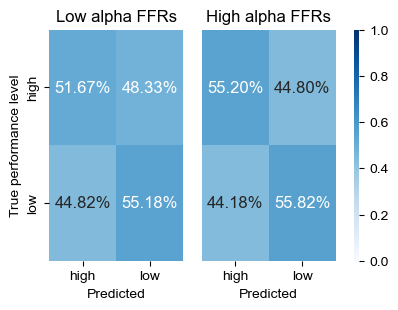

In [12]:
# All subject data
categories = ['high', 'low']
f,(ax1,ax2, axcb) = plt.subplots(1,3, gridspec_kw={'width_ratios':[5,5,0.2]})
sns.set(rc = {'figure.figsize':(5,3)})
ax1.get_shared_y_axes().join(ax2)
g1=sns.heatmap(np.mean(lo_cm, axis=0), annot=True, fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories,
               vmin=0, vmax=1,cbar=False,ax=ax1)
g1.set_xlabel('Predicted')
g1.set_ylabel('True performance level')
g1.set_title('Low alpha FFRs')

g2=sns.heatmap(np.mean(hi_cm, axis=0), annot=True, fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories,
           vmin=0, vmax=1, ax=ax2,cbar_ax=axcb)
g2.set_xlabel('Predicted')
g2.set_ylabel(' ')
g2.set_yticks([])
g2.set_title('High alpha FFRs')

plt.show()
#figpath='C:\\Users\\jlai\\OneDrive\\HR_loss\\Figs_tables\\'
#plt.savefig(figpath+'Clean_MLclass_cm.pdf')

## Plotting accuracies

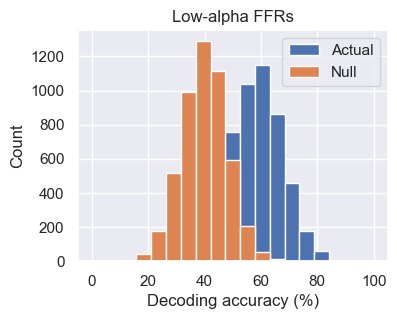

In [136]:
bins = np.linspace(0,100,20)
sns.set()
plt.hist(100*np.array(lo_acc), bins, label='Actual')
plt.hist(100*np.array(lo_acc_null), bins, label='Null')
plt.legend(loc='upper right')
plt.title('Low-alpha FFRs')
plt.ylabel('Count')
plt.xlabel('Decoding accuracy (%)')
plt.show()

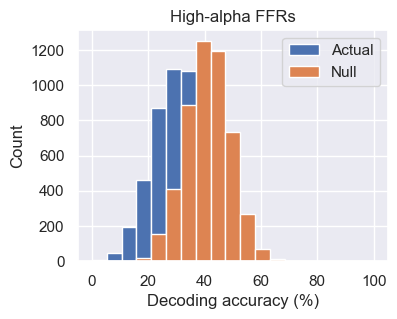

In [137]:
bins = np.linspace(0,100,20)
plt.hist(100*np.array(hi_acc), bins, label='Actual')
plt.hist(100*np.array(hi_acc_null), bins, label='Null')
plt.legend(loc='upper right')
plt.title('High-alpha FFRs')
plt.ylabel('Count')
plt.xlabel('Decoding accuracy (%)')
plt.show()

In [31]:
data1=[np.array(lo_acc_null)*100,np.array(hi_acc_null)*100]
data2=[np.array(lo_acc)*100,np.array(hi_acc)*100]

In [32]:
%matplotlib inline
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)

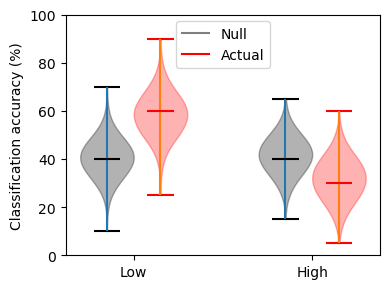

In [33]:
# Violin plots
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = (4,3)
labels=['Low','High']
x=np.arange(len(labels))
width=0.3

plt.figure()
bp1 = plt.violinplot(data1, positions=x - 0.15,widths=width,points=1000,showextrema=True, showmedians=True,bw_method=0.5)
bp2 = plt.violinplot(data2, positions=x + 0.15,widths=width,points=1000,showextrema=True, showmedians=True,bw_method=0.5)

# get figure bodies
for v in bp1['bodies']:
    v.set_color('black')
    v.set_edgecolor('black')
bp1['cmins'].set_color('black')
bp1['cmaxes'].set_color('black')
bp1['cmedians'].set_color('black')
    
for v in bp2['bodies']:
    v.set_color('red')
    v.set_edgecolor('red')
bp2['cmins'].set_color('red')
bp2['cmaxes'].set_color('red')
bp2['cmedians'].set_color('red')

plt.plot([], 'gray', label='Null')
plt.plot([], 'red', label='Actual')
plt.legend()

plt.ylabel('Classification accuracy (%)')
plt.ylim([0,100])
plt.xticks(x,labels)
plt.legend(loc='upper center')
plt.tight_layout()

#plt.savefig(figpath+'Clean_MLclass_acc.pdf')

In [34]:
# mean accuracy
lo_acc_mean=np.mean(lo_acc)
hi_acc_mean=np.mean(hi_acc)
print(lo_acc_mean)
print(hi_acc_mean)

0.58365
0.3166


In [142]:
# p calculation for low alpha
lo_acc_med=np.median(lo_acc)
a=lo_acc_null>lo_acc_med
lo_a=a.sum()
lo_p=(lo_a+1)/(5000+1)
lo_p

0.007598480303939212

In [143]:
# p calculation for high alpha
hi_acc_med=np.median(hi_acc)
a=hi_acc_null>hi_acc_med
hi_a=a.sum()
hi_p=(hi_a+1)/(5000+1)
hi_p

0.882623475304939

In [144]:
# p calculation for low vs high alpha
lo_acc_med=np.median(lo_acc)
a=hi_acc>lo_acc_med
lo_a=a.sum()
lo_p=(lo_a+1)/(5000+1)
lo_p

0.0003999200159968006